Scarica il file marziani.csv, gia usato nel capitolo 9. Addestra una foresta casuale alla classificazione dei marziani Robby e Simmy:
- traccia un grafico dell’accuratezza della classificazione rispetto alla profondità massima degli alberi decisionali utilizzati e stima il valore ottimale per il parametro max_depth

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data = pd.read_csv("./marziani.csv")
data

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,viola,20.0,3.87,14.77,73.22
1,Robby,viola,27.0,3.15,28.19,88.44
2,Robby,viola,25.0,4.35,12.05,76.74
3,Robby,blu,20.0,3.76,9.90,81.37
4,Robby,blu,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,Simmy,viola,29.0,4.55,35.48,68.47
1996,Simmy,blu,23.0,3.84,29.86,71.51
1997,Simmy,viola,22.0,4.55,29.41,68.38
1998,Simmy,rosso,27.0,4.53,33.12,68.10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   specie     2000 non-null   object 
 1   colore     1993 non-null   object 
 2   n_arti     1994 non-null   float64
 3   peso       2000 non-null   float64
 4   altezza    1995 non-null   float64
 5   larghezza  1997 non-null   float64
dtypes: float64(4), object(2)
memory usage: 93.9+ KB


In [7]:
features = ["peso","altezza","larghezza"]

In [8]:
data.dropna(inplace=True, subset=features+["specie"])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   specie     1992 non-null   object 
 1   colore     1985 non-null   object 
 2   n_arti     1986 non-null   float64
 3   peso       1992 non-null   float64
 4   altezza    1992 non-null   float64
 5   larghezza  1992 non-null   float64
dtypes: float64(4), object(2)
memory usage: 108.9+ KB


In [11]:
X = data[features].values
y = data["specie"]

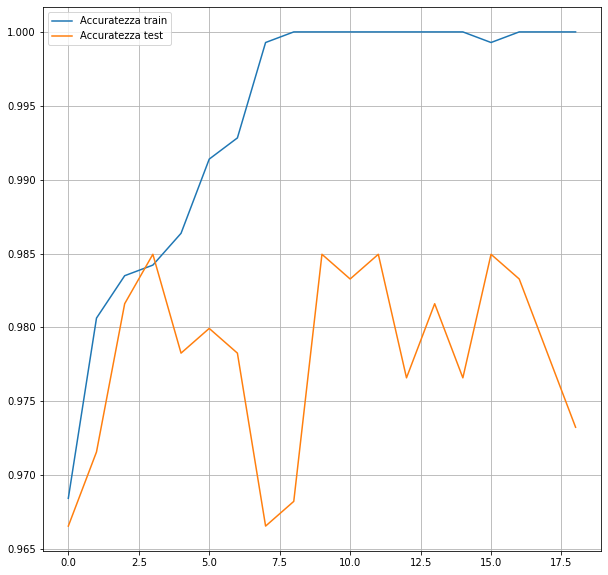

In [14]:
accs_train = []
accs_test = []

for i in range(1,20):
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)
    foresta = RandomForestClassifier(max_depth=i, n_estimators=100)
    foresta.fit(X_train, y_train)
    accs_train.append(foresta.score(X_train, y_train))
    accs_test.append(foresta.score(X_test, y_test))
    

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(accs_train, label="Accuratezza train")
ax.plot(accs_test, label="Accuratezza test")
ax.legend()
ax.grid()
plt.show()

In [15]:
accs_test = np.array(accs_test)
accs_test

array([0.96655518, 0.97157191, 0.98160535, 0.98494983, 0.97826087,
       0.97993311, 0.97826087, 0.96655518, 0.96822742, 0.98494983,
       0.98327759, 0.98494983, 0.97658863, 0.98160535, 0.97658863,
       0.98494983, 0.98327759, 0.97826087, 0.97324415])

In [18]:
max_acc = accs_test.max()
max_acc

0.9849498327759197

In [23]:
np.where(accs_test == max_acc)[0]

array([ 3,  9, 11, 15])